## Load data

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Specify the name of the columns
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']

# Features
features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

# Get the features
X = df[features].values

# Get the target
y = df['Class'].values

## Data preprocessing

In [2]:
from sklearn.preprocessing import LabelEncoder

# The label encoder for the target
le = LabelEncoder()

# Encode the target
y = le.fit_transform(y)

## The 1 $\times$ 5 matrix

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(22, 4))

## Column 0: the scatter plot between Petal width and Petal length

In [4]:
import numpy as np

# Get the x values
x_col = features.index('Petal width')
x_vals = X[:, x_col]
x_vals_u = np.unique(x_vals)

# Get the y values
y_col = features.index('Petal length')
y_vals = X[:, y_col]
y_vals_u = np.unique(y_vals)

# Get the color, marker, and label
colors = ["red", "green", "blue"]
markers = ["o", "*", "s"]
labels = ["1", "2", "3"]

# Get the data
data = {}
for num in range(3):
    data_x = [x_vals[i] for i in range(len(y)) if y[i] == num]
    data_y = [y_vals[i] for i in range(len(y)) if y[i] == num]
    data[num] = [data_x, data_y]
    
ax = axs[0]

for num, color, marker, label in zip(data.keys(), colors, markers, labels):
    data_x, data_y = data[num]
    x_idxs = [list(x_vals_u).index(xi) for xi in data_x]
    y_idxs = [list(y_vals_u).index(yi) for yi in data_y]
    ax.scatter(x_idxs, y_idxs, c=color, marker=marker, s=200, label=label)

ax.legend(loc=(-0.1, 0.25), shadow=True, fontsize=30, frameon=False, handletextpad=-0.5)

# Get the length of x_vals and the mid index
n = len(x_vals_u)
mid = n // 2
ax.set_xlabel('Petal width', fontsize=30)
ax.set_xticks([0, mid, n - 1])
ax.set_xticklabels([x_vals_u[0], x_vals_u[mid], x_vals_u[n - 1]], fontsize=30)

n = len(y_vals_u)
mid = n // 2
ax.set_ylabel('Petal length', fontsize=30)
ax.set_yticks([0, mid, n - 1])
ax.set_yticklabels([y_vals_u[0], y_vals_u[mid], y_vals_u[n - 1]], fontsize=30)

[Text(0,0,'1.0'), Text(0,0,'4.5'), Text(0,0,'6.9')]

## Column 1: the scatter plot between Sepal width and Sepal length

In [5]:
# Get the x values
x_col = features.index('Sepal width')
x_vals = X[:, x_col]
x_vals_u = np.unique(x_vals)

# Get the y values
y_col = features.index('Sepal length')
y_vals = X[:, y_col]
y_vals_u = np.unique(y_vals)

# Get the color, marker, and label
colors = ["red", "green", "blue"]
markers = ["o", "*", "s"]
labels = ["1", "2", "3"]

# Get the data
data = {}
for num in range(3):
    data_x = [x_vals[i] for i in range(len(y)) if y[i] == num]
    data_y = [y_vals[i] for i in range(len(y)) if y[i] == num]
    data[num] = [data_x, data_y]
    
ax = axs[1]

for num, color, marker, label in zip(data.keys(), colors, markers, labels):
    data_x, data_y = data[num]
    x_idxs = [list(x_vals_u).index(xi) for xi in data_x]
    y_idxs = [list(y_vals_u).index(yi) for yi in data_y]
    ax.scatter(x_idxs, y_idxs, c=color, marker=marker, s=200, label=label)

# Get the length of x_vals and the mid index
n = len(x_vals_u)
mid = n // 2
ax.set_xlabel('Sepal width', fontsize=30)
ax.set_xticks([0, mid, n - 1])
ax.set_xticklabels([x_vals_u[0], x_vals_u[mid], x_vals_u[n - 1]], fontsize=30)

n = len(y_vals_u)
mid = n // 2
ax.set_ylabel('Sepal length', fontsize=30)
ax.set_yticks([0, mid, n - 1])
ax.set_yticklabels([y_vals_u[0], y_vals_u[mid], y_vals_u[n - 1]], fontsize=30)

[Text(0,0,'4.3'), Text(0,0,'6.0'), Text(0,0,'7.9')]

## Column 2: the importance distribution of Petal width for Setosa

In [6]:
# Load the distribution file
df = pd.read_csv('/Users/yhuang/Desktop/ala/result/ours/iris/prob_dist_file/iris.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 'Iris-setosa') & (df['xj'] == ' Petal width')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[2]

# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='red')
ax.set_xlabel('Petal width', fontsize=30)
ax.set_xticks([0, 11, 21])
ax.set_xticklabels([0.1, 1.5, 2.5], fontsize=30)

ax.set_ylabel('Importance', fontsize=30)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=30)

[Text(0,0,'0'), Text(0,0,'0.5'), Text(0,0,'1')]

## Column 3: the importance distribution of Petal width for Versicolor

In [7]:
# Load the distribution file
df = pd.read_csv('/Users/yhuang/Desktop/ala/result/ours/iris/prob_dist_file/iris.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == 'Iris-versicolor') & (df['xj'] == ' Petal width')]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[3]

# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='green')
ax.set_xlabel('Petal width', fontsize=30)
ax.set_xticks([0, 11, 21])
ax.set_xticklabels([0.1, 1.5, 2.5], fontsize=30)

ax.set_ylabel('Importance', fontsize=30)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=30)

[Text(0,0,'0'), Text(0,0,'0.5'), Text(0,0,'1')]

## Column 4: the importance distribution of Petal width for Virginca

In [8]:
# Load the distribution file
df = pd.read_csv('/Users/yhuang/Desktop/ala/result/ours/iris/prob_dist_file/iris.csv', header=0)

# Specify the name of the columns
df.columns = ['yu', 'xj', 'xij', 'pij']

df = df.loc[(df['yu'] == "Iris-virginica") & (df['xj'] == " Petal width")]

# Get the feature values
xijs = df['xij'].values

# Get the probabilities
pijs = df['pij'].values

ax = axs[4]

# Plot the bar chart
ax.bar(range(len(xijs)), pijs, color='blue')
ax.set_xlabel('Petal width', fontsize=30)
ax.set_xticks([0, 11, 21])
ax.set_xticklabels([0.1, 1.5, 2.5], fontsize=30)

ax.set_ylabel('Importance', fontsize=30)
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize=30)

[Text(0,0,'0'), Text(0,0,'0.5'), Text(0,0,'1')]

## Plot

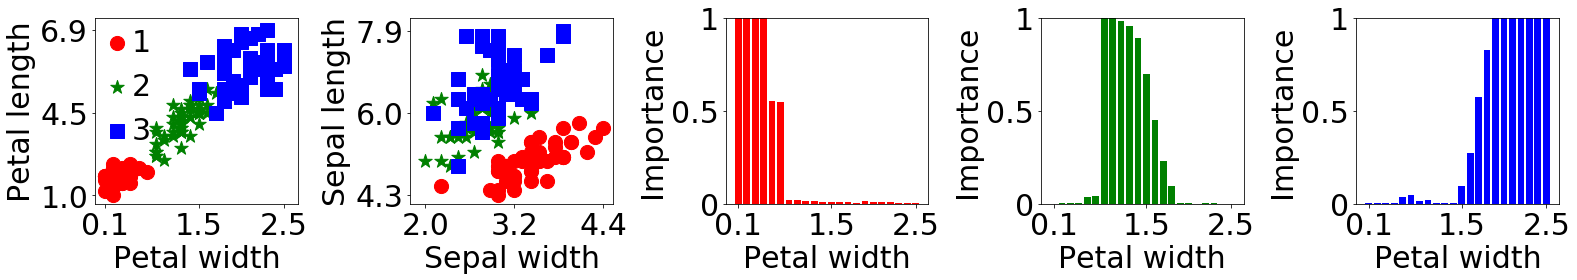

In [9]:
fig.tight_layout()
plt.savefig('/Users/yhuang/Desktop/ala/result/fig_1_by_5.pdf', dpi=300)
plt.show()